In [1]:
#Imports
import os
os.environ["OMP_NUM_THREADS"] = '1'
import pandas as pd
import numpy as np
import joblib
import shap
import matplotlib.pyplot as plt
import lime
from lime.lime_tabular import LimeTabularExplainer
from sklearn.preprocessing import KBinsDiscretizer
import seaborn as sns
import imgkit

In [2]:
loaded_joblib=joblib.load('linreg.joblib')
loaded_joblib.keys()

dict_keys(['preprocessor', 'X_train', 'y_train', 'X_test', 'y_test', 'LinearRegression'])

In [3]:
loaded_joblib2=joblib.load('rfreg.joblib')
loaded_joblib2.keys()

dict_keys(['preprocessor', 'X_train', 'y_train', 'X_test', 'y_test', 'RandomForest'])

In [4]:
X_train=loaded_joblib2['X_train']
X_test=loaded_joblib2['X_test']
y_train=loaded_joblib2['y_train']
y_test=loaded_joblib2['y_test']
preprocessor=loaded_joblib2['preprocessor']
loaded_model=loaded_joblib2['RandomForest']

In [5]:
len(X_train)

6392

In [6]:
X_shap=shap.sample(X_train,random_state=42,nsamples=100)
X_shap.head(2)

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
2937        8.365         0.039811  191.3188                     1987.0   
6371        9.695         0.030414  221.3114                     2009.0   

      Item_Fat_Content_Regular  Item_Type_Breads  Item_Type_Breakfast  \
2937                       1.0               0.0                  0.0   
6371                       1.0               0.0                  0.0   

      Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  ...  \
2937               0.0              0.0                     0.0  ...   
6371               0.0              0.0                     0.0  ...   

      Outlet_Identifier_OUT046  Outlet_Identifier_OUT049  Outlet_Size_MISSING  \
2937                       0.0                       0.0                  0.0   
6371                       0.0                       0.0                  0.0   

      Outlet_Size_Medium  Outlet_Size_Small  Outlet_Location_Type_Tier 2  \
2937                 0.0                0.0                          0.0   
6371                 1.0                0.0                          0.0   

      Outlet_Location_Type_Tier 3  Outlet_Type_Supermarket Type1  \
2937                          1.0                            1.0   
6371                          1.0                            0.0   

      Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  
2937                            0.0                            0.0  
6371                            1.0                            0.0  

[2 rows x 37 columns]

In [7]:
y_shap=y_train.loc[X_shap.index]
y_shap

2937    2285.0256
6371    2217.1140
3762     196.4110
419     2940.1728
8475     378.1744
          ...    
2076    2516.7240
3986    4250.4672
1267    1884.2140
454     2683.1740
7869    2626.5810
Name: Item_Outlet_Sales, Length: 100, dtype: float64

In [8]:
explainer=shap.Explainer(loaded_model)
explainer

In [9]:
shap_values=explainer(X_shap,y_shap)
type(shap_values)

shap._explanation.Explanation

In [10]:
X_shap.shape

(100, 37)

In [11]:
shap_values.shape

(100, 37)

In [12]:
shap_values[0]

.values =
array([-6.14661339e+01, -1.84383489e+02,  4.65045115e+02, -1.14194355e+01,
       -4.55448555e+00, -1.08458423e+00, -6.77257591e+00, -7.29898532e+00,
       -6.20918603e-02, -4.45082465e+00, -2.16970085e+01, -3.80195308e+00,
       -2.36990334e+00, -6.58995786e+00, -9.88756328e+00,  4.95215064e-02,
       -2.30681113e+00, -3.14870111e+00,  1.43277268e+00, -9.45389667e+00,
        5.17946111e+00, -3.22925455e+00, -2.34429774e+01,  1.23051144e+01,
       -1.20067754e+02, -4.57928735e+00, -3.94345265e+00, -2.49183957e+00,
       -9.58229057e+00,  2.22920022e+00, -3.03921791e+01, -8.88625131e+00,
       -9.64962270e-01, -2.77431023e-01,  3.85384838e+02, -2.96504302e+01,
       -1.18304384e+02])

.base_values =
array([2204.3176469])

.data =
array([8.3650000e+00, 3.9811272e-02, 1.9131880e+02, 1.9870000e+03,
       1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.000

In [13]:
pd.DataFrame(shap_values.values, columns = X_shap.columns)

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
0    -61.466134      -184.383489   465.045115                 -11.419435   
1     -0.684241       -55.304035   893.435022                 185.370911   
2     18.828631        43.166836 -1055.221808                 -76.318745   
3    236.921127       224.339936    19.962243                  36.789486   
4   -109.181528       -54.448420 -1030.561018                 -35.490754   
..          ...              ...          ...                        ...   
95   -40.844553        55.830407  -111.114741                  67.377676   
96    80.259165       308.582586   420.856912                  15.866031   
97   -15.234592       -50.185223   555.091175                 191.207157   
98    45.809332       147.089037  -675.349716                   9.094917   
99    53.702163       -17.313785   501.250942                 195.492339   

    Item_Fat_Content_Regular  Item_Type_Breads  Item_Type_Breakfast  \
0                  -4.554486         -1.084584            -6.772576   
1                  15.563714         -2.859091            -4.063655   
2                  -2.869520         -0.587977            -0.610121   
3                  -9.950411         -0.897182            -0.115892   
4                 -11.776095         -1.501100            -0.929838   
..                       ...               ...                  ...   
95                 15.548263         -0.258884             0.346330   
96                 -0.654951         -0.640667            -0.459064   
97                -21.963794         -4.769059            -2.950379   
98                 15.844429         -0.032911            -0.223241   
99                -11.459456         -6.613754            -1.080403   

    Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  ...  \
0          -7.298985        -0.062092               -4.450825  ...   
1          -1.123594        -2.698873              -13.987883  ...   
2          -1.136874        -0.580420               11.683743  ...   
3          -0.915653         3.558407                0.611475  ...   
4          -1.794811         1.651211               -2.136009  ...   
..               ...              ...                     ...  ...   
95         -2.790939         0.447441                3.608135  ...   
96         -0.636343         1.935895                2.181324  ...   
97         -4.624659        -7.848184               -1.204016  ...   
98          0.905077         0.446021                0.252921  ...   
99         -6.176740        -7.468813               -2.321740  ...   

    Outlet_Identifier_OUT046  Outlet_Identifier_OUT049  Outlet_Size_MISSING  \
0                  -2.491840                 -9.582291             2.229200   
1                   3.899317                 -2.677361             9.114323   
2                   0.368368                 -0.908340            -7.399880   
3                   4.333343                 -3.811203            -5.086082   
4                   0.128687                -21.064635            -1.765130   
..                       ...                       ...                  ...   
95                  0.625418                  1.104257            -2.938600   
96                  3.066623                  2.504904            12.125638   
97                 -0.997558                 -2.851273            10.858794   
98                  6.037772                  1.962512             6.050673   
99                  0.282287                 -0.969340            11.436906   

    Outlet_Size_Medium  Outlet_Size_Small  Outlet_Location_Type_Tier 2  \
0           -30.392179          -8.886251                    -0.964962   
1           134.865415           2.618911                     0.013086   
2           -57.652134           1.384389                     0.596650   
3           -28.239241          13.504648                    -2.451974   
4            17.339442          -1.636558                    -2.237354   
..  

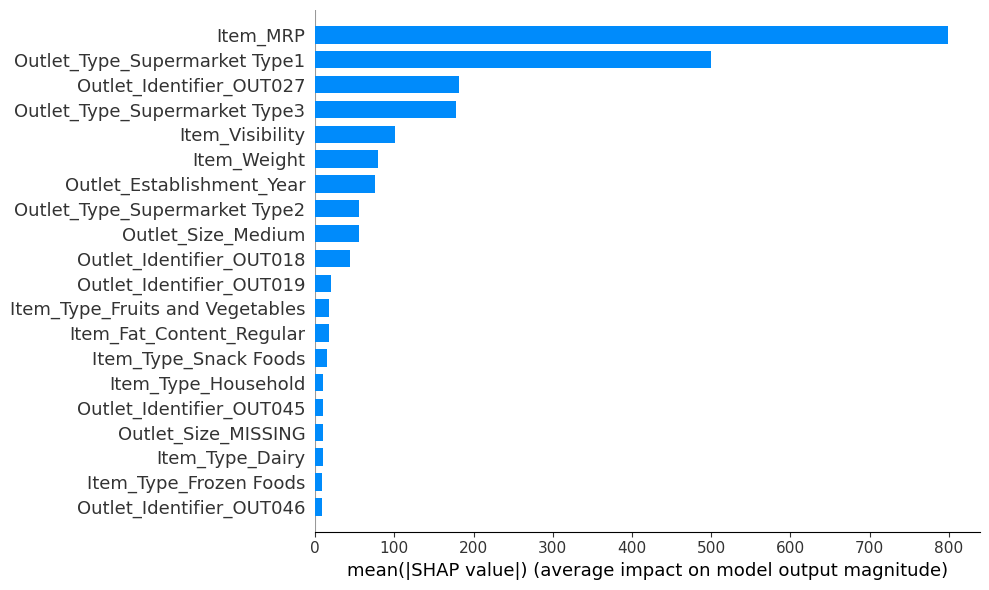

In [14]:
shap.summary_plot(shap_values, features=X_shap, plot_type='bar', show=False, plot_size=(10, 6))
plt.gcf().savefig('shap.png')

# Comparing to Importance with SHAP

   * Item_MRP: Both Shap and our Random Forest model this is a very important feature in our predictions.
   * Item_Visibility: This shows on both, but seems to have a very low impact according to SHAP.
   * Outlet_Type: Is shown as important in both scorings.

![importance](importances.png)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


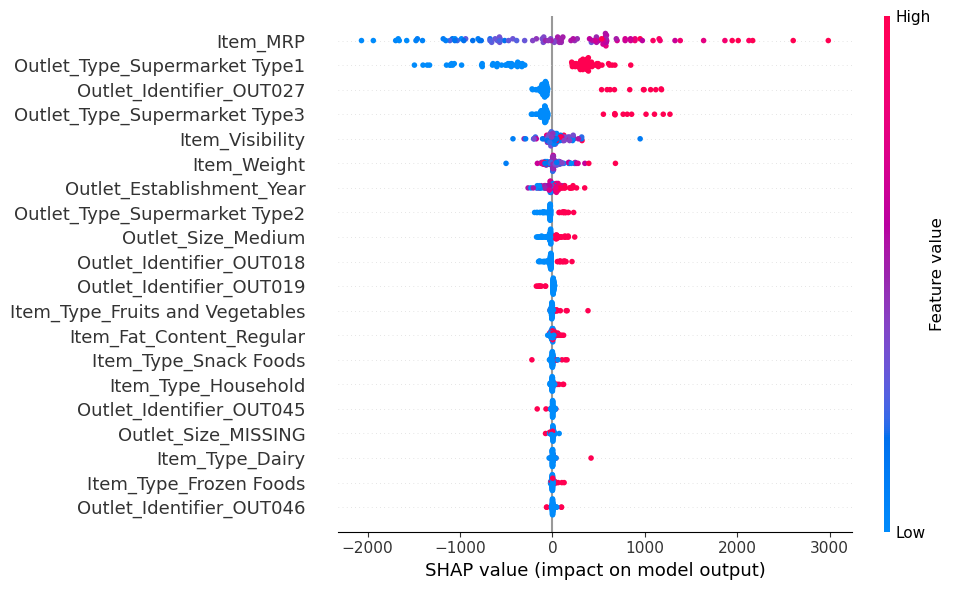

In [15]:
shap.summary_plot(shap_values,features= X_shap, plot_type='dot', show=False, plot_size=(10, 6))
plt.gcf().savefig('shapdot.png')

# Evalute 'dot' plot

* Outlet_Type_Grocery store: Grocery store type has the best sales.
* Item_MRP: Effects the model in both ways. 
* Outlet_Identifier_OUT027: Highest selling store.

# Local Explanations

In [16]:
X_shap.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_Regular',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_MISSING', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_

<Axes: xlabel='Outlet_Type_Supermarket Type1', ylabel='Count'>

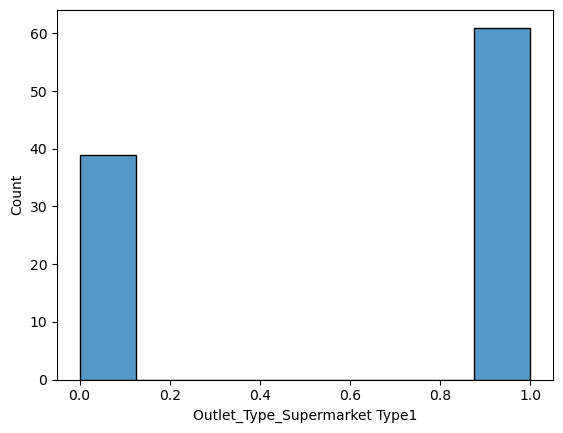

In [17]:
sns.histplot(X_shap['Outlet_Type_Supermarket Type1'])

<Axes: xlabel='Outlet_Identifier_OUT027', ylabel='Count'>

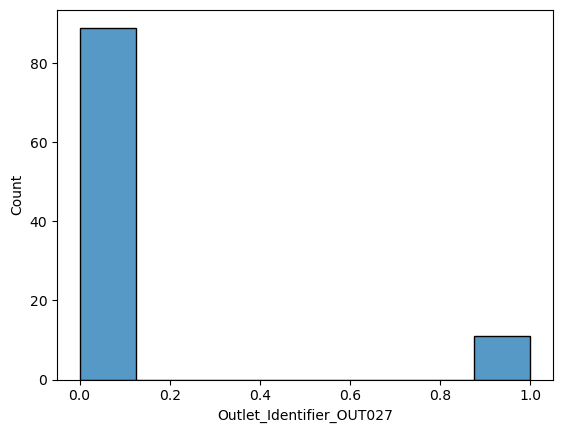

In [18]:
sns.histplot(X_shap['Outlet_Identifier_OUT027'])

<Axes: xlabel='Item_Visibility', ylabel='Count'>

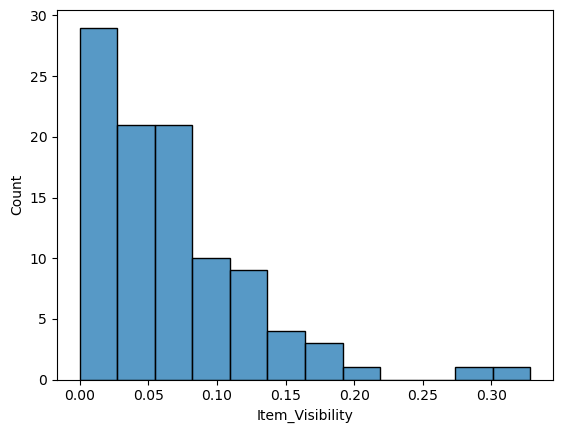

In [19]:
sns.histplot(X_shap['Item_Visibility'])

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Count'>

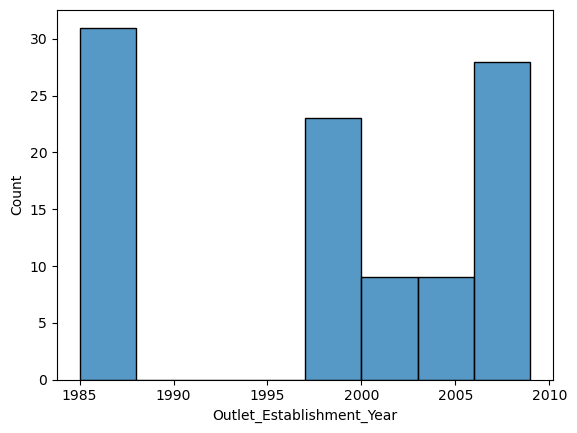

In [20]:
sns.histplot(X_shap['Outlet_Establishment_Year'])

## Based on previous insights, we will select Low Sales Outlet and High Sales outlet. This will help us explain why each sells higher or lower.

### Low Sales

In [21]:
X_shap=X_shap.reset_index(drop=True)
y_shap=y_shap.reset_index(drop=True)

In [22]:
y_pred=pd.Series(loaded_model.predict(X_shap),index=X_shap.index)

In [23]:
y_pred.idxmin()

30

In [24]:
low_sales=y_pred.idxmin()

In [25]:
high_sales=y_pred.idxmax()

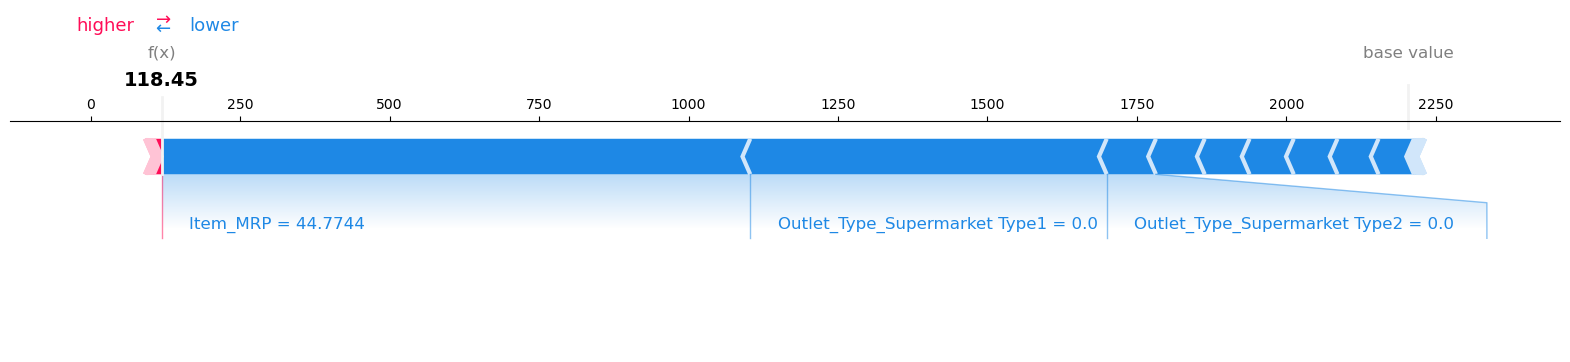

In [26]:
shap.initjs()
force_plot = shap.force_plot(explainer.expected_value, shap_values[low_sales].values,
                             features=X_shap.iloc[low_sales], matplotlib=True, show=False)
plt.savefig('shap_force_plot_low.png', bbox_inches='tight', dpi=300)
force_plot

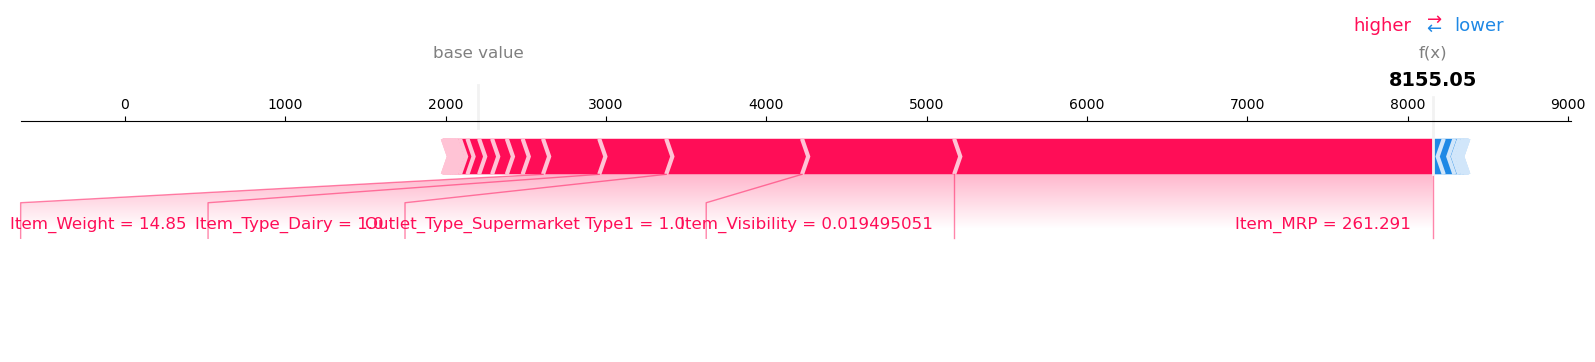

In [27]:
shap.initjs()
force_plot = shap.force_plot(explainer.expected_value, shap_values[high_sales].values,
                             features=X_shap.iloc[high_sales], matplotlib=True, show=False)
plt.savefig('shap_force_plot_high.png', bbox_inches='tight', dpi=300)
force_plot

In [28]:
lime_explainer =LimeTabularExplainer(
    training_data=X_shap.values,
    feature_names=X_shap.columns,
    class_names=['Pass', 'Fail'],
    mode='regression'
)
lime_explainer

In [29]:
#Using imgkit, and wkhtmltopdf to save the html files as pngs.
def save_exp_to_png(lime_explainer, instance_values, output_file):
    exp = lime_explainer.explain_instance(instance_values,loaded_model.predict)
    exp.save_to_file(output_file)
    imgkit.from_file(output_file, output_file.replace('.html','.png'))

In [30]:
exp = lime_explainer.explain_instance(X_shap.iloc[high_sales].values, loaded_model.predict)
exp.show_in_notebook()
save_exp_to_png(lime_explainer, X_shap.iloc[high_sales].values, 'highsaleslime.html')

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


In [31]:
exp = lime_explainer.explain_instance(X_shap.iloc[low_sales].values, loaded_model.predict)
exp.show_in_notebook()
save_exp_to_png(lime_explainer, X_shap.iloc[low_sales].values, 'lowsaleslime.html')

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               
